Import necessary modules

In [143]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import heart attack data

In [8]:
ha_costs_df = pd.read_csv("/Users/jennifergribble/data-science-essentials-3/data/mmd_heart_attack_data.csv")

View first and last 5 entries in heart attack data

In [9]:
ha_costs_df.head(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [10]:
ha_costs_df.tail(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


Get information about heart attack information data frame

In [11]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 2656 non-null   int64 
 1   geography            2656 non-null   object
 2   measure              2656 non-null   object
 3   adjustment           2656 non-null   object
 4   analysis             2656 non-null   object
 5   domain               2656 non-null   object
 6   condition            2656 non-null   object
 7   primary_sex          2656 non-null   object
 8   primary_age          2656 non-null   object
 9   primary_dual         2656 non-null   object
 10  fips                 2656 non-null   int64 
 11  county               2656 non-null   object
 12  state                2656 non-null   object
 13  urban                2656 non-null   object
 14  primary_race         2656 non-null   object
 15  primary_denominator  2656 non-null   object
 16  analys

Slice only data from Tenneessee

In [12]:
ha_costs_df_TN = ha_costs_df.loc[ha_costs_df['state'] == 'TENNESSEE']

Output number of counties with data for heart attacks

In [13]:
ha_costs_df_TN['county'].nunique()

91

Output distribution of rural and urban counties in TN dataset

In [14]:
ha_costs_df_TN['urban'].value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

Import MMD Cancer data

In [15]:
cancer_costs_df = pd.read_csv('/Users/jennifergribble/data-science-essentials-3/data/mmd_cancer_data.csv')

View first and last entries in cancer dataset

In [16]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [17]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


Slice only data pertaining to TN

In [18]:
cancer_costs_df_TN = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

Output number of TN counties represented in cancer dataset

In [19]:
cancer_costs_df_TN['county'].nunique()

95

Output counties missing from heart attack TN data

In [20]:
common_counties = ha_costs_df_TN.merge(cancer_costs_df, on=['county']) #merge heart attack and cancer data by county
cancer_costs_df_TN[~cancer_costs_df_TN.county.isin(common_counties.county)] #output counties present in cancer data but not in heart attack data

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2429,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47067,Hancock County,TENNESSEE,Rural,All,undefined,22515
2459,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47127,Moore County,TENNESSEE,Rural,All,undefined,16978
2464,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47137,Pickett County,TENNESSEE,Rural,All,undefined,16768
2483,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47175,Van Buren County,TENNESSEE,Rural,All,undefined,16244


Import IRS income dataset

In [21]:
income_df = pd.read_csv('/Users/jennifergribble/data-science-essentials-3/data/irs_county_2016.csv')

View first entries of IRS income data

In [22]:
income_df.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152
2,1,AL,0,Alabama,3,529780,259680,80320,181410,297440,...,297770,290358,0,0,0,0,41330,40647,474140,1569463
3,1,AL,0,Alabama,4,495750,211100,141800,127420,272030,...,397940,983800,40,22,0,0,73880,110840,415850,1173195
4,1,AL,0,Alabama,5,263130,82330,137610,35760,154540,...,252940,1346083,20,27,0,0,63240,140446,194790,542205


Slice TN IRS income data

In [23]:
income_df_TN = income_df.loc[income_df['STATE'] == 'TN']

View first and last entries in income dataset

In [24]:
income_df_TN.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [25]:
income_df_TN.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


Select specific columns from IRS income dataset

In [26]:
income_df_TN = income_df_TN[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

Rename columns

In [27]:
income_df_TN.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

Print distribution of analysis value for urban and rural counties for heart attack data

In [28]:
ha_costs_df_TN_urban = ha_costs_df_TN.loc[ha_costs_df_TN['urban'] == 'Urban']
print(ha_costs_df_TN_urban['analysis_value'].describe())

count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64


In [29]:
ha_costs_df_TN_rural = ha_costs_df_TN.loc[ha_costs_df_TN['urban'] == 'Rural']
print(ha_costs_df_TN_rural['analysis_value'].describe())

count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64


Print distribution of analysis value for urban and rural counties for cancer data

In [30]:
cancer_costs_df_TN_urban = cancer_costs_df_TN.loc[cancer_costs_df_TN['urban'] == 'Urban']
print(cancer_costs_df_TN_urban['analysis_value'].describe())

count       38.000000
mean     19638.605263
std       2712.218435
min      15454.000000
25%      17674.750000
50%      19203.500000
75%      20556.750000
max      27740.000000
Name: analysis_value, dtype: float64


In [31]:
cancer_costs_df_TN_rural = cancer_costs_df_TN.loc[cancer_costs_df_TN['urban'] == 'Rural']
print(cancer_costs_df_TN_rural['analysis_value'].describe())

count       57.000000
mean     19837.421053
std       2255.416100
min      15531.000000
25%      18328.000000
50%      19633.000000
75%      21315.000000
max      25909.000000
Name: analysis_value, dtype: float64


Check numerical values of income_bucket column in IRS income data

In [32]:
income_df_TN.head(20)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,6,241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,7,298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,8,97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


Creat dictionary of numerical value keys with string identifiers. Replace income bucket values with strings

In [33]:
income_bucket_dict = {'1':'Under $1', '2':'Between 1 and $10,000', '3':'Between 10,000 and $25,000', '4':'Between 25,000 and $50,000', '5':'Between 50,000 and $75,000', '6':'Between 75,000 and $100,000', '7':'Between 100,000 and $200,000', '8':'$200,000 or more'}

In [34]:
income_df_TN['income_bucket'] = income_df_TN['income_bucket'].astype(str) #convert float data to string
income_df_TN['income_bucket'] = income_df_TN['income_bucket'].replace(income_bucket_dict)

In [35]:
income_df_TN.head() #check to see if it worked

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


Aggregate data based on county

In [36]:
income_county_agg = income_df_TN.groupby(by=['county']).sum().reset_index()

In [37]:
income_county_agg.head() #check to see if it worked

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


Find the county with highest number of IRS returns and total income.

In [38]:
income_county_agg_county_only = income_county_agg.loc[income_county_agg['county'] != 'Tennessee'] #exclude total TN data to leave just individual county data
income_county_agg_county_only.loc[income_county_agg_county_only['return_count'].idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

In [39]:
income_county_agg_county_only.loc[income_county_agg_county_only['total_inc_amt'].idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

In [40]:
income_df_TN_total = income_df_TN.loc[income_df_TN['county'] == 'Tennessee']

In [41]:
income_df_TN_total.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


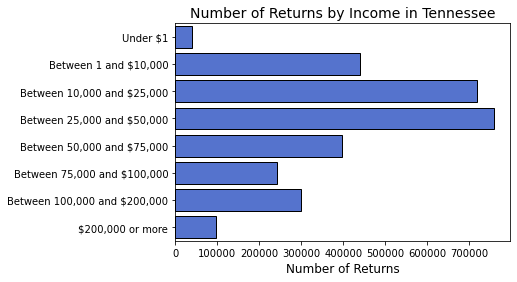

In [64]:
sns.barplot(y='income_bucket', x='return_count', data = income_df_TN_total, color = 'royalblue', edgecolor = 'black')
plt.xlabel("Number of Returns", fontsize=12)
plt.ylabel("")
plt.title('Number of Returns by Income in Tennessee', fontsize=14);

In [43]:
income_county_agg['mean_income'] = 1000*(income_county_agg['total_inc_amt'] / income_county_agg['return_count'])

In [44]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,mean_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888


In [45]:
income_county_agg_county_only = income_county_agg.loc[income_county_agg['county'] != 'Tennessee'] #exclude total TN data to leave just individual county data

In [46]:
income_county_agg_county_only.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,mean_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888


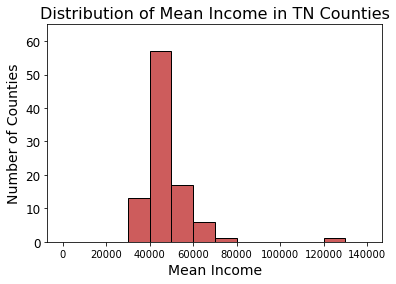

In [70]:
plt.hist('mean_income', data = income_county_agg_county_only, color = 'indianred', edgecolor = 'black', bins = 14, range = (0, 140000))
plt.xlabel("Mean Income", fontsize = 14)
plt.ylabel("Number of Counties", fontsize = 14)
plt.ylim((0,65))
plt.yticks(fontsize=12)
plt.title("Distribution of Mean Income in TN Counties", fontsize=16);

In [92]:
ha_costs_df_TN_urban

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2034,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,38968
2035,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47011,Bradley County,TENNESSEE,Urban,All,undefined,40068
2037,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47015,Cannon County,TENNESSEE,Urban,All,undefined,50604
2039,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47019,Carter County,TENNESSEE,Urban,All,undefined,45266
2040,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47021,Cheatham County,TENNESSEE,Urban,All,undefined,32279
2041,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47023,Chester County,TENNESSEE,Urban,All,undefined,49264
2048,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47037,Davidson County,TENNESSEE,Urban,All,undefined,50778
2051,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47043,Dickson County,TENNESSEE,Urban,All,undefined,53168
2053,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47047,Fayette County,TENNESSEE,Urban,All,undefined,43000


In [96]:
ha_data_boxplot = [ha_costs_df_TN_urban['analysis_value'], ha_costs_df_TN_rural['analysis_value']]

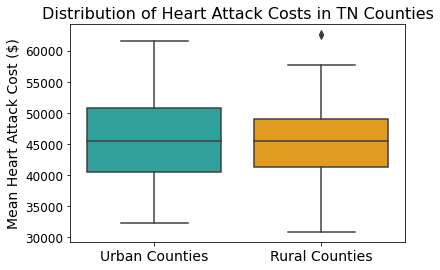

In [105]:
sns.boxplot(data=ha_data_boxplot, palette = ["lightseagreen", "orange"])
plt.ylabel("Mean Heart Attack Cost ($)", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize=14, labels = ["Urban Counties", "Rural Counties"], ticks = [0, 1])
plt.title("Distribution of Heart Attack Costs in TN Counties", fontsize=16);

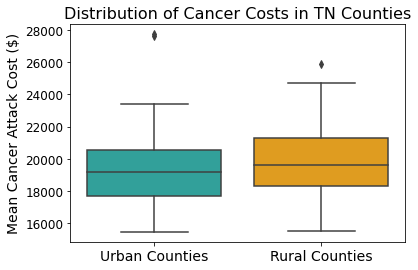

In [109]:
cancer_data_boxplot = [cancer_costs_df_TN_urban['analysis_value'], cancer_costs_df_TN_rural['analysis_value']]
sns.boxplot(data=cancer_data_boxplot, palette = ["lightseagreen", "orange"])
plt.ylabel("Mean Cancer Attack Cost ($)", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize=14, labels = ["Urban Counties", "Rural Counties"], ticks = [0, 1])
plt.title("Distribution of Cancer Costs in TN Counties", fontsize=16);

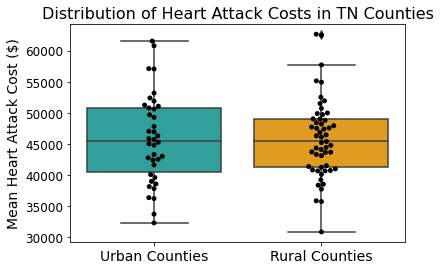

In [112]:
sns.boxplot(data=ha_data_boxplot, palette = ["lightseagreen", "orange"])
sns.swarmplot(x="urban", y = "analysis_value", data = ha_costs_df_TN, color = "black")
plt.ylabel("Mean Heart Attack Cost ($)", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize=14, labels = ["Urban Counties", "Rural Counties"], ticks = [0, 1])
plt.xlabel("")
plt.title("Distribution of Heart Attack Costs in TN Counties", fontsize=16);

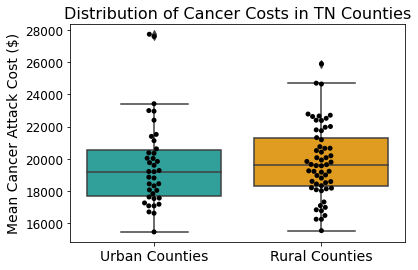

In [113]:
sns.boxplot(data=cancer_data_boxplot, palette = ["lightseagreen", "orange"])
sns.swarmplot(x="urban", y = "analysis_value", data = cancer_costs_df_TN, color = "black")
plt.ylabel("Mean Cancer Attack Cost ($)", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize=14, labels = ["Urban Counties", "Rural Counties"], ticks = [0, 1])
plt.xlabel("")
plt.title("Distribution of Cancer Costs in TN Counties", fontsize=16);

In [119]:
ha_costs_df_TN = ha_costs_df_TN.rename(columns = {'analysis_value':'ha_avg_cost'})
cancer_costs_df_TN = cancer_costs_df_TN.rename(columns={'analysis_value':'cancer_avg_cost'})

In [120]:
ha_costs_df_TN_slice = ha_costs_df_TN[['county', 'ha_avg_cost']]
cancer_costs_df_TN_slice = cancer_costs_df_TN[['county', 'urban', 'cancer_avg_cost']]
tn_df = pd.merge(ha_costs_df_TN_slice, cancer_costs_df_TN_slice, on='county', how='inner')

In [124]:
tn_df

,county,ha_avg_cost,urban,cancer_avg_cost
0,Anderson County,42749,Urban,15454
1,Bedford County,43661,Rural,19219
2,Benton County,44423,Rural,21315
3,Bledsoe County,41240,Rural,19250
4,Blount County,38968,Urban,17073
...,...,...,...,...
86,Wayne County,40652,Rural,22658
87,Weakley County,55139,Rural,20655
88,White County,40717,Rural,18515
89,Williamson County,61541,Urban,17527


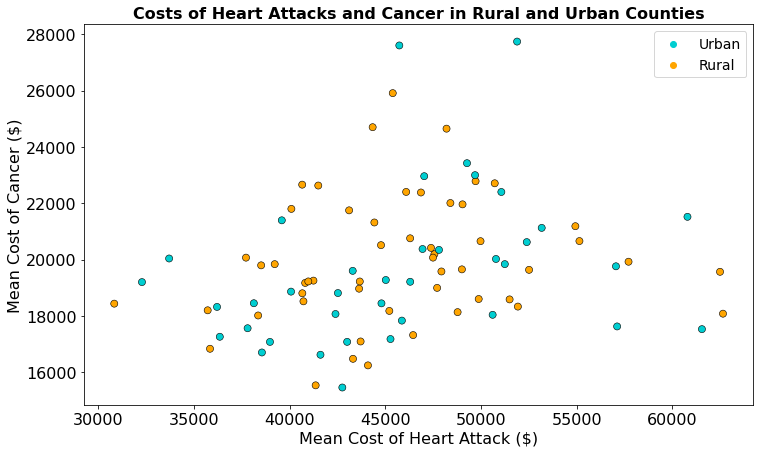

In [135]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = tn_df, x = 'ha_avg_cost', y = 'cancer_avg_cost', s = 50,
                hue='urban',
                palette = ['darkturquoise', 'orange'],
                edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Mean Cost of Heart Attack ($)', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Mean Cost of Cancer ($)', fontsize = fontsize)
plt.title('Costs of Heart Attacks and Cancer in Rural and Urban Counties', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2);

In [137]:
tn_df = pd.merge(income_county_agg, tn_df, on='county', how='inner')

In [140]:
tn_df['ha_cost_income_ratio'] = tn_df['ha_avg_cost'] / tn_df['mean_income']
tn_df['cancer_cost_income_ratio'] = tn_df['cancer_avg_cost'] / tn_df['mean_income']

In [141]:
tn_df

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,mean_income,ha_avg_cost,urban,cancer_avg_cost,ha_cost_income_ratio,cancer_cost_income_ratio
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535,42749,Urban,15454,0.800807,0.289496
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262,43661,Rural,19219,0.926443,0.407808
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710,44423,Rural,21315,1.075704,0.516143
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351,41240,Rural,19250,1.037650,0.484354
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888,38968,Urban,17073,0.686224,0.300654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42556.719023,40652,Rural,22658,0.955243,0.532419
87,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.315175,55139,Rural,20655,1.238319,0.463873
88,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40296.554850,40717,Rural,18515,1.010434,0.459469
89,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129768.971201,61541,Urban,17527,0.474235,0.135063


In [151]:
counties = gpd.read_file('../data/county/tncounty.shp')
counties['NAME'] = counties['NAME'].astype('str') + ' County'
counties

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester County,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne County,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton County,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton County,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart County,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."
...,...,...,...,...,...,...
90,91,McNairy County,47109,1.563586e+10,566369.132062,"POLYGON ((1137985.762 344601.643, 1139350.519 ..."
91,92,Franklin County,47051,1.605093e+10,621176.096919,"POLYGON ((1873015.265 239618.144, 1872957.848 ..."
92,93,Bradley County,47011,9.241234e+09,457372.233476,"POLYGON ((2274954.438 239788.911, 2275552.803 ..."
93,94,Marion County,47115,1.428734e+10,529431.591556,"POLYGON ((2126056.390 236919.771, 2122873.509 ..."


In [155]:
tn_df = tn_df.rename(columns = {'county':'NAME'})
counties_tn_df = pd.merge(counties, tn_df)

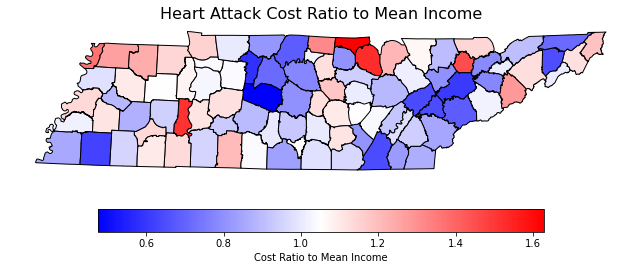

In [181]:
fig, ax = plt.subplots(figsize=(16,4))
counties_tn_df.plot(column = 'ha_cost_income_ratio',
                    ax = ax,
                    cmap = 'bwr',
                    legend = True,
                    legend_kwds={'label':"Cost Ratio to Mean Income", 'shrink':0.5, 'orientation':'horizontal'},
                    edgecolor='black'
                   )
plt.title('Heart Attack Cost Ratio to Mean Income', fontsize=16)
ax.axis('off');

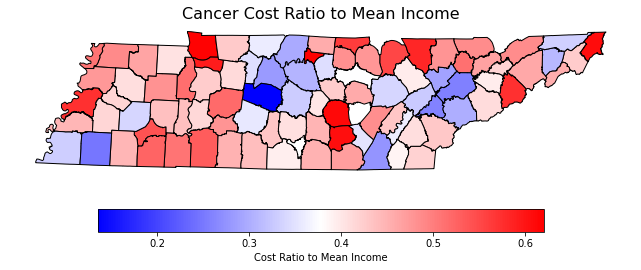

In [182]:
fig, ax = plt.subplots(figsize=(16,4))
counties_tn_df.plot(column = 'cancer_cost_income_ratio',
                    ax = ax,
                    cmap = 'bwr',
                    legend = True,
                    legend_kwds={'label':"Cost Ratio to Mean Income", 'shrink':0.5, 'orientation':'horizontal'},
                    edgecolor='black'
                   )
plt.title('Cancer Cost Ratio to Mean Income', fontsize=16)
ax.axis('off');